# Part g): Analysis of real data subset
## terrain data

/tmp/ipykernel_70020/35273436.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain1 = imread('DataFiles/SRTM_data_Norway_1.tif')


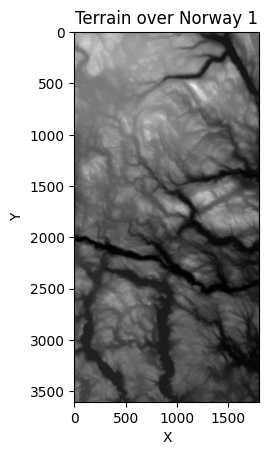

In [6]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
# Load the terrain
terrain1 = imread('DataFiles/SRTM_data_Norway_1.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 1')
plt.imshow(terrain1, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

/tmp/ipykernel_70020/2698357255.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  terrain2 = imread('DataFiles/SRTM_data_Norway_2.tif')


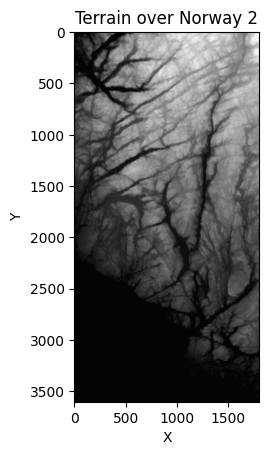

In [7]:
terrain2 = imread('DataFiles/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure()
plt.title('Terrain over Norway 2')
plt.imshow(terrain2, cmap='gray')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [8]:
terrain1 = np.array(terrain1)
#terrain2 = np.array(terrain2)



x1 = np.arange(0,1, 1/terrain1.shape[1])
x2 = np.arange(0,1,1/terrain1.shape[0])
x1m, x2m = np.meshgrid(x1,x2)
x1m, x2m

(array([[0.00000000e+00, 5.55247085e-04, 1.11049417e-03, ...,
         9.98334259e-01, 9.98889506e-01, 9.99444753e-01],
        [0.00000000e+00, 5.55247085e-04, 1.11049417e-03, ...,
         9.98334259e-01, 9.98889506e-01, 9.99444753e-01],
        [0.00000000e+00, 5.55247085e-04, 1.11049417e-03, ...,
         9.98334259e-01, 9.98889506e-01, 9.99444753e-01],
        ...,
        [0.00000000e+00, 5.55247085e-04, 1.11049417e-03, ...,
         9.98334259e-01, 9.98889506e-01, 9.99444753e-01],
        [0.00000000e+00, 5.55247085e-04, 1.11049417e-03, ...,
         9.98334259e-01, 9.98889506e-01, 9.99444753e-01],
        [0.00000000e+00, 5.55247085e-04, 1.11049417e-03, ...,
         9.98334259e-01, 9.98889506e-01, 9.99444753e-01]]),
 array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.77700639e-04, 2.77700639e-04, 2.77700639e-04, ...,
         2.77700639e-04, 2.77700639e-04, 2.77700639e-04],
        [5.55401277e-04, 

In [9]:
x, y, z = x1m.flatten(), x2m.flatten(), terrain1.flatten()
dataset = np.c_[x, y, z]
dataset = dataset[np.random.choice(dataset.shape[0], size=1_000_000, replace=False)]

x1f_sub, x2f_sub, terrain1_sub = dataset[:, 0], dataset[:, 1], dataset[:, 2]

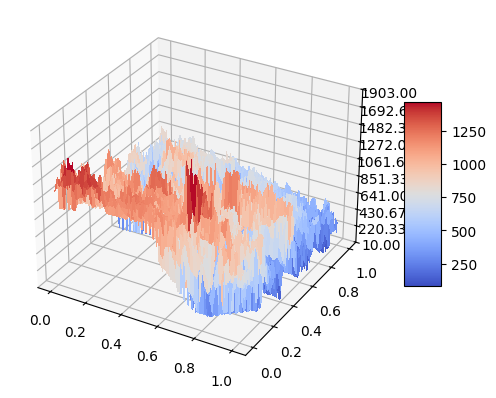

In [5]:
from matplotlib.ticker import LinearLocator, FormatStrFormatter
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
# Plot the surface.
surf = ax.plot_surface(x1m, x2m, terrain1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(10, 1903)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [6]:
import pandas as pd
print(pd.DataFrame(terrain1.flatten()).describe())
print(pd.DataFrame(terrain2.flatten()).describe())

                  0
count  6.485401e+06
mean   7.030221e+02
std    3.034944e+02
min    5.000000e+01
25%    4.840000e+02
50%    7.110000e+02
75%    9.240000e+02
max    1.865000e+03
                  0
count  6.485401e+06
mean   3.328511e+02
std    2.957447e+02
min   -2.100000e+01
25%    2.200000e+01
50%    2.820000e+02
75%    5.690000e+02
max    1.203000e+03


## function from other files

In [10]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd

In [11]:
import scipy.special # for binomial coefficient
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  r2_score
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

''' generate design matrix without intercept column for flattend x1, x2 '''
def design_no_in(x1f, x2f, degreeplus1):
    n = x1f.size
    # 1. setting up design matrix
    # we work here with intercept column
    # the designmatrix s.t. we have the features 1, x1, x2, x1x2, x1^2, x2^2, ....
    # with max totaldegree 5
    # number of possible monoms up to degree 5 for 2 variables is 2+5 choose 5
    num_of_monoms = scipy.special.binom(degreeplus1 + 1, degreeplus1 -1)
    X = np.zeros((n, int(num_of_monoms))) # afterwards the intercept column is removed
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1f**i * x2f**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1
    # remove now intercept column
    X = X[:,1:]
    return X
    


'''
generate data for meshgrid (x1m, x2m) and according y. degree is the maximum degree of the
polynomial represented by the designmatrix
'''
def data(degree, x1f, x2f, y):
    degreeplus1 = degree + 1

    x1m_flat = x1f
    x2m_flat = x2f
    
    X = design_no_in(x1m_flat, x2m_flat, degreeplus1)
    
    # 2. split the data in test and training data
    X_train, X_test, y_train, y_test = train_test_split(X, y.flatten())
 
    # 3. scaling of training data (by subtracting the mean value of each column)
    X_train_mean = np.mean(X_train, axis=0)
    X_train_scaled = X_train  - X_train_mean

    y_train_mean = np.mean(y_train)
    y_train_scaled = y_train - y_train_mean

    # in order to use beta for test → test has to be scaled by training means
    X_test_scaled = X_test - X_train_mean
    #X_test_scaled = X_test - X_train_mean
    y_test_scaled = y_test - y_train_mean

    return X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test

def design_with_in(x1f, x2f, degreeplus1):
    n = x1f.size
    num_of_monoms = scipy.special.binom(degreeplus1 + 1, degreeplus1 -1)
    X = np.zeros((n, int(num_of_monoms)))
    c = 0
    for i in range(degreeplus1):
        for j in range(degreeplus1 - i):
            X[:,c] = x1f**i * x2f**j
            #print('{} {}'.format(i,j))
            #print(X[:,c])
            #print('x_1^{} * x_2^{}'.format(i,j)) 
            c += 1
    return X


#ausführen

## LASSO for subset

In [6]:
from sklearn.linear_model import Lasso
def Lasso_analysis(lambd, maxdegree, x1f,x2f,y):

    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))
    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    
    degrees = np.arange(1,maxdegree + 1)
    for degree in degrees:
        print('DEGREE = ' + str(degree))
        X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1f, x2f, y)
        
        # LASSO REGRESSION: (without intercept, = 0 thus)
        lasso = Lasso(lambd)
        lasso.fit(X_train,y_train)
        ypredict_train_LA = lasso.predict(X_train)
        ypredict_test_LA = lasso.predict(X_test)

        betas[degree-1] = np.hstack([lasso.intercept_,  lasso.coef_, np.zeros(( num_monoms  - 1 - lasso.coef_.size,))])

 
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_LA)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_LA)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_LA)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_LA)


    return betas, MSE, R2, degrees

In [7]:
maxdegree = 20
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

betas_lam_lasub = np.zeros((maxdegree, int(scipy.special.binom(maxdegree + 2, maxdegree)), num_lambdas))
MSE_lam_lasub = np.zeros((maxdegree,2, num_lambdas))
R2_lam_lasub = np.zeros((maxdegree,2, num_lambdas))



it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    betas_lam_lasub[:,:,it], MSE_lam_lasub[:,:,it], R2_lam_lasub[:,:,it], degrees = Lasso_analysis(lambd, maxdegree, x1f_sub,x2f_sub,terrain1_sub)
    it += 1

lambda = 1e-05
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.679e+10, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.668e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+10, tolerance: 6.917e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.635e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.617e+10, tolerance: 6.916e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.600e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.591e+10, tolerance: 6.923e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.579e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 11


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.570e+10, tolerance: 6.905e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 12


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.564e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 13


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.558e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 14


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.554e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 15


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.550e+10, tolerance: 6.919e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 16


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.549e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 17


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+10, tolerance: 6.905e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 18


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+10, tolerance: 6.918e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 19


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+10, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 20


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+10, tolerance: 6.914e+06
  model = cd_fast.enet_coordinate_descent(


lambda = 0.0001
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.666e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.663e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.647e+10, tolerance: 6.908e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.634e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.611e+10, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.599e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.582e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.572e+10, tolerance: 6.907e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 11


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.565e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 12


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.559e+10, tolerance: 6.919e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 13


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.552e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 14


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.547e+10, tolerance: 6.907e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 15


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.543e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 16


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.541e+10, tolerance: 6.907e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 17


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.538e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 18


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+10, tolerance: 6.916e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 19


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.538e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 20


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.537e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


lambda = 0.001
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.552e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.605e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.603e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.597e+10, tolerance: 6.914e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.567e+10, tolerance: 6.919e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+10, tolerance: 6.917e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.525e+10, tolerance: 6.903e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.514e+10, tolerance: 6.916e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 11


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.504e+10, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 12


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+10, tolerance: 6.908e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 13


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.500e+10, tolerance: 6.917e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 14


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.499e+10, tolerance: 6.914e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 15


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.496e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 16


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.487e+10, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 17


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 18


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.482e+10, tolerance: 6.918e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 19


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+10, tolerance: 6.915e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 20


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.483e+10, tolerance: 6.914e+06
  model = cd_fast.enet_coordinate_descent(


lambda = 0.01
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.288e+09, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+10, tolerance: 6.918e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+10, tolerance: 6.924e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.258e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.185e+10, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.868e+09, tolerance: 6.907e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.400e+09, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.082e+09, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 11


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.005e+09, tolerance: 6.909e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 12


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.825e+09, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 13


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.038e+09, tolerance: 6.919e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 14


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.083e+10, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 15


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.091e+10, tolerance: 6.908e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 16


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.057e+10, tolerance: 6.916e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 17


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+10, tolerance: 6.906e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 18


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.014e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 19


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+10, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 20


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.007e+10, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


lambda = 0.1
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.948e+08, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.474e+08, tolerance: 6.917e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.873e+08, tolerance: 6.904e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.987e+08, tolerance: 6.919e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.440e+08, tolerance: 6.911e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.690e+08, tolerance: 6.916e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.280e+08, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.858e+08, tolerance: 6.917e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 11


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.032e+08, tolerance: 6.914e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 12


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+08, tolerance: 6.913e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 13


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+08, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 14


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.964e+07, tolerance: 6.916e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 15


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.419e+08, tolerance: 6.908e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 16


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.440e+08, tolerance: 6.912e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 17


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.650e+08, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 18


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.562e+08, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 19


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.922e+08, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


DEGREE = 20


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.087e+08, tolerance: 6.910e+06
  model = cd_fast.enet_coordinate_descent(


lambda = 1
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
DEGREE = 11
DEGREE = 12
DEGREE = 13
DEGREE = 14
DEGREE = 15
DEGREE = 16
DEGREE = 17
DEGREE = 18
DEGREE = 19
DEGREE = 20
lambda = 10
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
DEGREE = 11
DEGREE = 12
DEGREE = 13
DEGREE = 14
DEGREE = 15
DEGREE = 16
DEGREE = 17
DEGREE = 18
DEGREE = 19
DEGREE = 20


In [11]:
np.save('MSE_LA_SUB_terrain1.npy', MSE_lam_lasub)
np.save('betas_LA_SUB_terrain1.npy', betas_lam_lasub)
np.save('R2_LA_SUB_terrain1.npy', R2_lam_lasub)

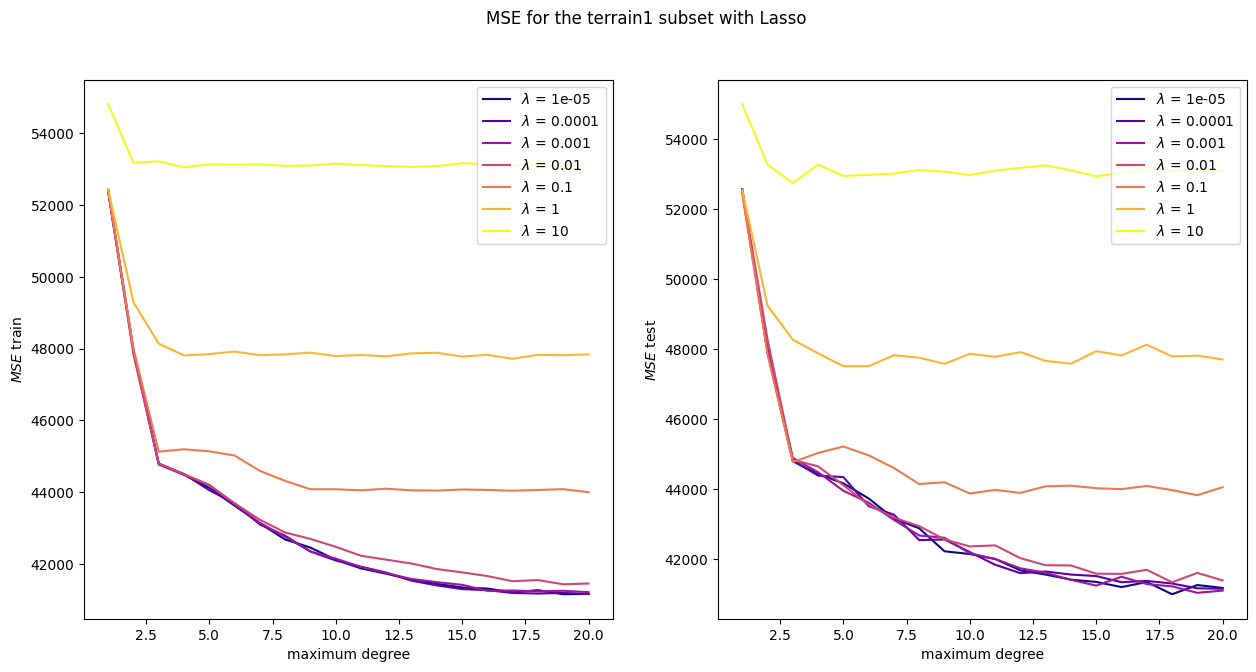

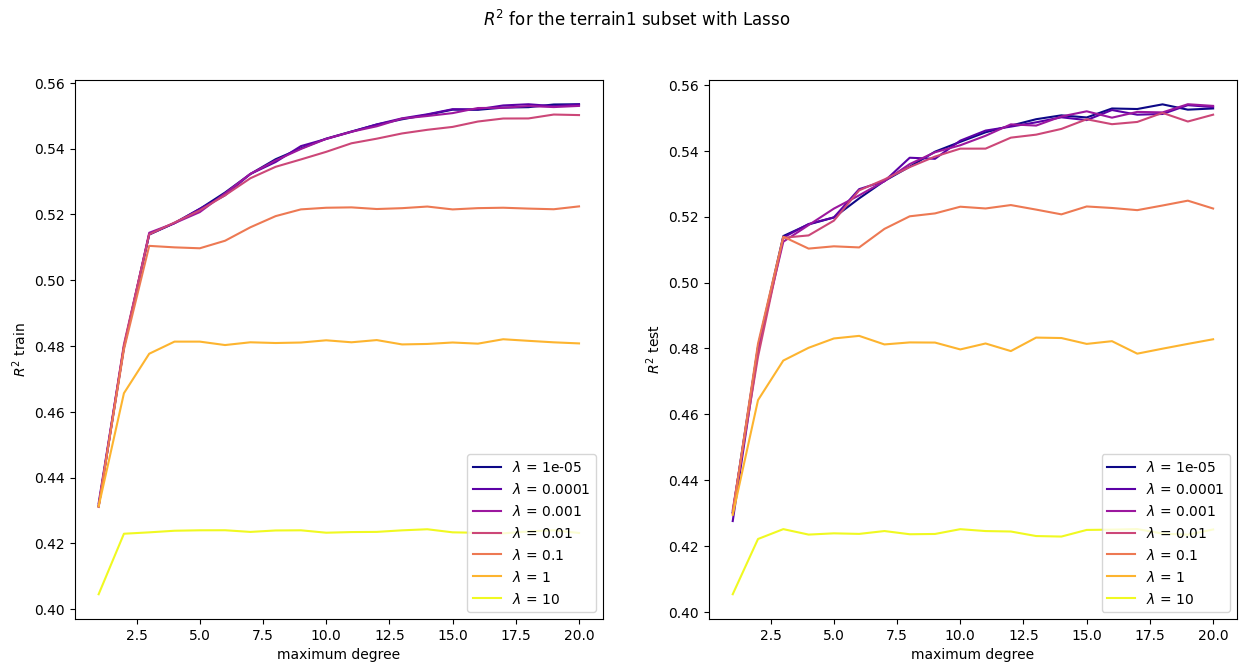

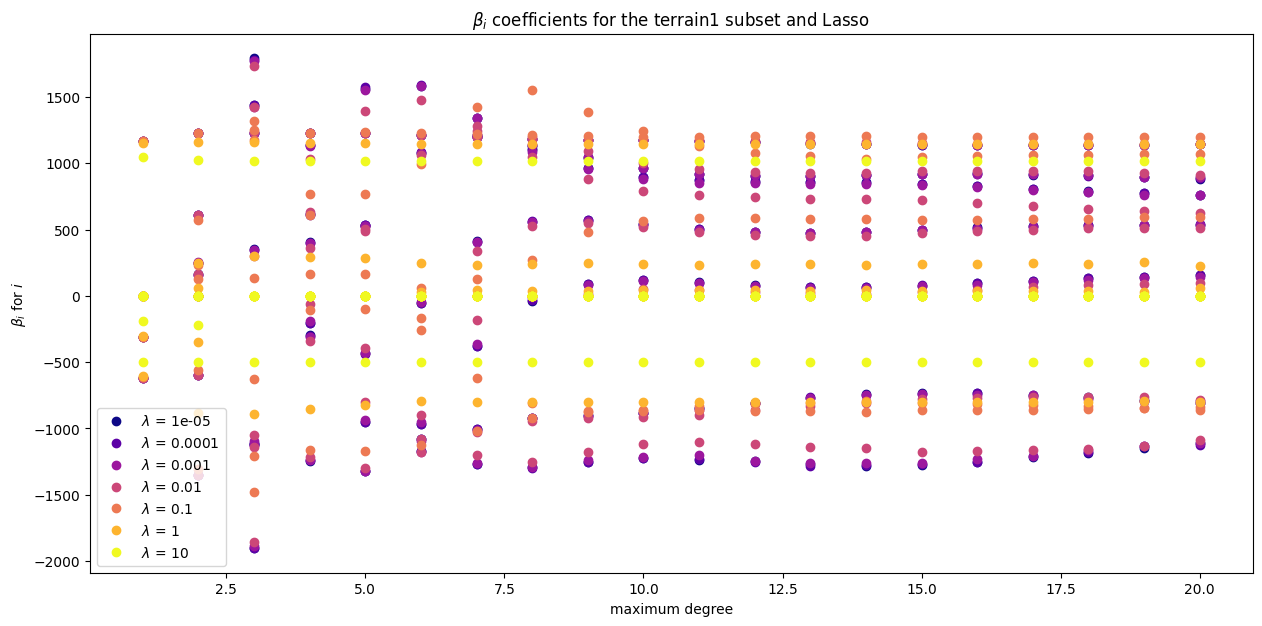

In [14]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

# plot MSE for train, test and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,MSE_lam_lasub[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,MSE_lam_lasub[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

fig.suptitle('MSE for the terrain1 subset with Lasso')

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$MSE$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$MSE$ test')
plt.savefig('MSE_Lasso_terrain1_sub.png')

# plot R^2 for train and test  and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,R2_lam_lasub[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,R2_lam_lasub[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

fig.suptitle(r'$R^2$ for the terrain1 subset with Lasso')
axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$R^2$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$R^2$ test')
plt.savefig('R2_Lasso_terrain1.png')

fig.savefig('R2_Lasso_terrain1_sub')

# plot beta for lambda values
fig = plt.figure(figsize=(15, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,betas_lam_lasub[:,0, it], marker='o', linestyle='', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    for i in range(1,betas_lam_lasub.shape[2]):
        axs.plot(degrees,betas_lam_lasub[:,i, it], marker='o', linestyle='', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum degree', ylabel= r'$\beta_i$ for $i$',title=r'$\beta_i$ coefficients for the terrain1 subset and Lasso')
plt.savefig('beta_Lasso_terrain1_sub.png')

In [12]:
MSE_lam_lasub = np.load('MSE_LA_SUB_terrain1.npy')
betas_lam_lasub = np.load('betas_LA_SUB_terrain1.npy')
R2_lam_lasub = np.load('R2_LA_SUB_terrain1.npy')

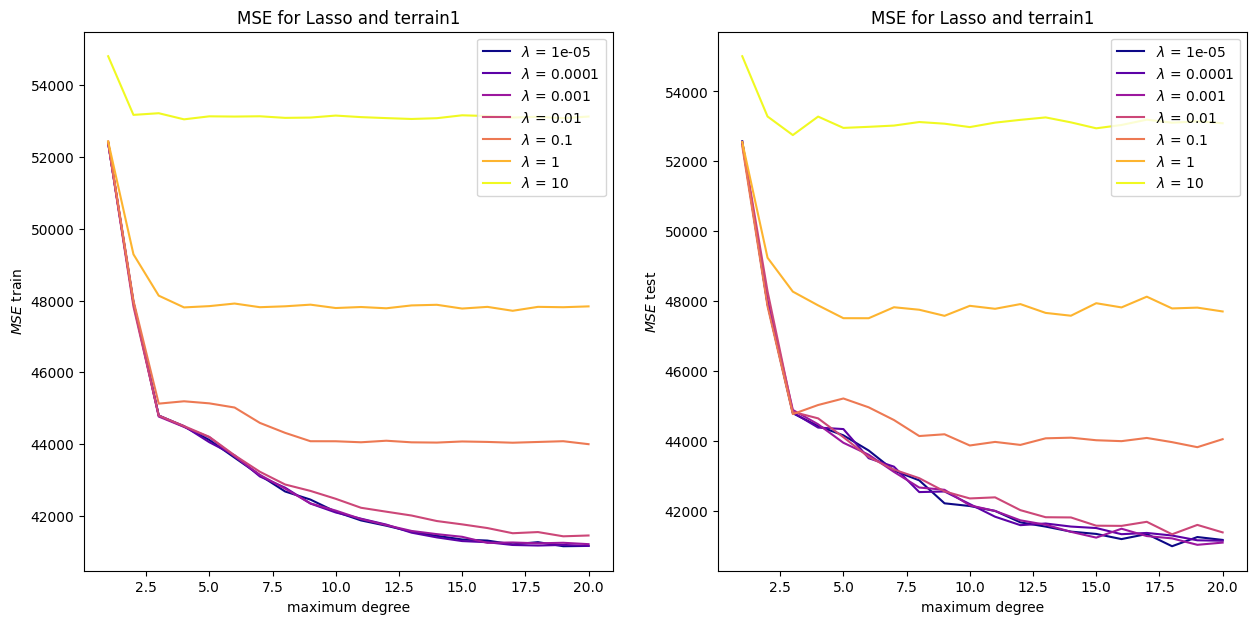

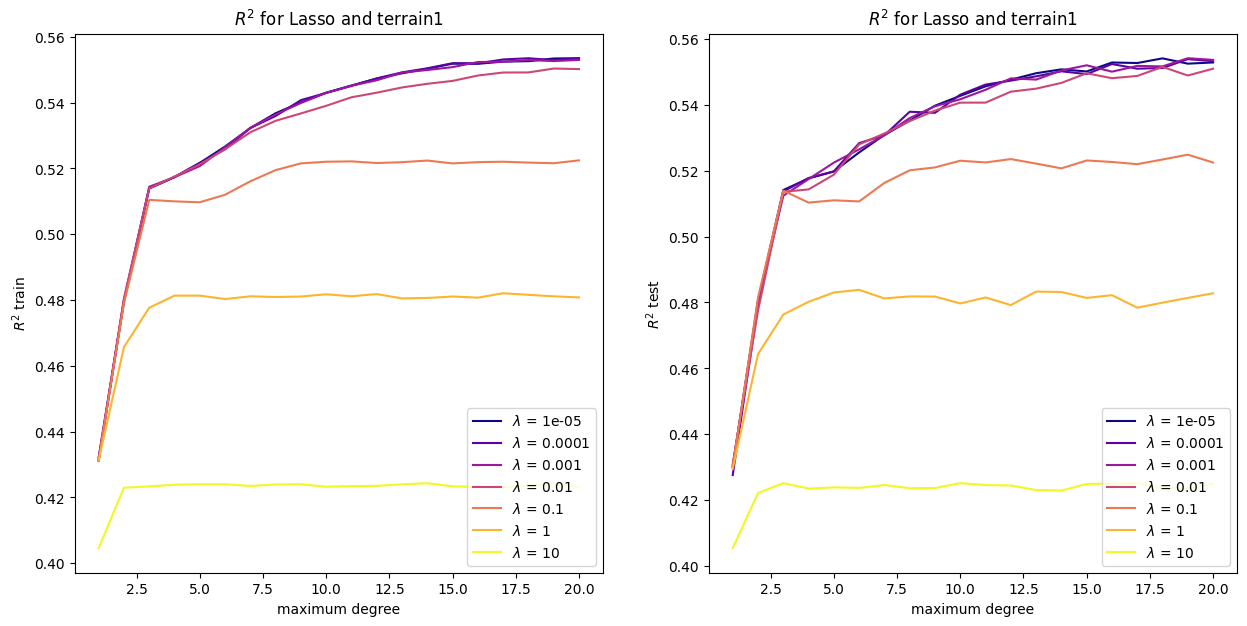

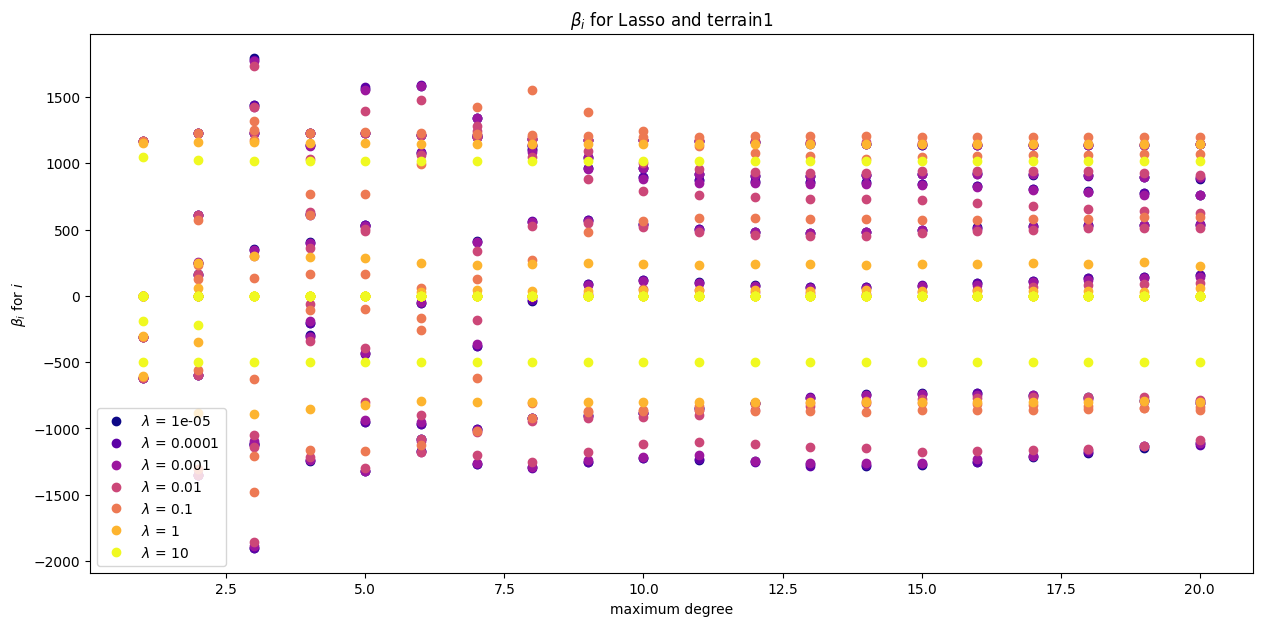

In [ ]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

# plot MSE for train, test and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,MSE_lam_lasub[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,MSE_lam_lasub[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$MSE$ train', title='MSE for Lasso and terrain1')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$MSE$ test', title='MSE for Lasso and terrain1')
plt.savefig('MSE_Lasso_terrain1.png')

# plot R^2 for train and test  and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,R2_lam_lasub[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,R2_lam_lasub[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$R^2$ train', title=r'$R^2$ for Lasso and terrain1')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$R^2$ test', title=r'$R^2$ for Lasso and terrain1')
plt.savefig('R2_Lasso_terrain1.png')

# plot beta for lambda values
fig = plt.figure(figsize=(15, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,betas_lam_lasub[:,0, it], marker='o', linestyle='', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    for i in range(1,betas_lam_lasub.shape[2]):
        axs.plot(degrees,betas_lam_lasub[:,i, it], marker='o', linestyle='', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum degree', ylabel= r'$\beta_i$ for $i$',title=r'$\beta_i$ for Lasso and terrain1')
plt.savefig('beta_Lasso_terrain1.png')

## RIDGE for subset

In [16]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

In [ ]:
def Ridge_analysis(lambd,maxdegree, x1f,x2f,y):

    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))
    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    
    degrees = np.arange(1,maxdegree + 1)
    for degree in degrees:
        print('DEGREE = ' + str(degree))
        X, X_train, X_test, X_train_scaled, X_train_mean, X_test_scaled, y_train_scaled, y_train_mean, y_train, y_test = data(degree, x1m, x2m, y)
        
        # RIDGE REGRESSION:
        beta_rr = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lambd*np.identity(X_train_scaled.shape[1])) @ X_train_scaled.T @ y_train_scaled #without intercept
        intercept = y_train_mean - X_train_mean @ beta_rr
        betas[degree-1] = np.hstack([intercept,  beta_rr, np.zeros(( num_monoms  - 1 - beta_rr.size,))])
                
        #print('beta = {}'.format(beta_rr))
        
        ypredict_train_RR =  X_train_scaled @ beta_rr + y_train_mean
        ypredict_test_RR = X_test_scaled @ beta_rr + y_train_mean
        ypredict_all_RR = X @ beta_rr + y_train_mean

   
        
        MSE[degree-1, 0] = mean_squared_error(y_train, ypredict_train_RR)
        MSE[degree-1, 1] = mean_squared_error(y_test, ypredict_test_RR)
        R2[degree-1, 0] = r2_score(y_train, ypredict_train_RR)
        R2[degree-1, 1] = r2_score(y_test, ypredict_test_RR)


    return betas, MSE, R2, degrees


maxdegree = 9
betas_lam = np.zeros((maxdegree, int(scipy.special.binom(maxdegree + 2, maxdegree)), num_lambdas))
MSE_lam = np.zeros((maxdegree,2, num_lambdas))
R2_lam = np.zeros((maxdegree,2, num_lambdas))

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    betas_lam[:,:,it], MSE_lam[:,:,it], R2_lam[:,:,it], degrees = Ridge_analysis(lambd,maxdegree,x1f_sub,x2f_sub,terrain1_sub)
    it += 1

np.save('betas_RI_SUB_terrain1', betas_lam)
np.save('MSE_RIDGE_TERRAIN1_SUB',MSE_lam)
np.save('R2_RIDGE_TERRAIN1_SUB',R2_lam)

In [ ]:
#np.load('betas_RI_SUB_terrain1')

lambda = 1e-05
lambda = 0.0001
lambda = 0.001
lambda = 0.01
lambda = 0.1
lambda = 1
lambda = 10


In [ ]:
import matplotlib as mpl

# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

# plot MSE for train, test and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,MSE_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,MSE_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$MSE$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$MSE$ test')


# plot R^2 for train and test  and lambda values
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
it = 0
for lambd in lambdas:
    axs[0].plot(degrees,R2_lam[:,0, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs[1].plot(degrees,R2_lam[:,1, it], c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs[0].legend()
axs[1].legend()
axs[0].set(xlabel =r'maximum degree', ylabel= r'$R^2$ train')
axs[1].set(xlabel =r'maximum degree', ylabel= r'$R^2$ test')


# TODO THIS IS STILL SHIIIT → MAKE SUBPLOTS FOR EVER LAMBDA !!!!
# plot beta for lambda values
fig = plt.figure(figsize=(15, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,betas_lam[:,0, it], marker='o', linestyle='', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    for i in range(1,betas_lam.shape[2]):
        axs.plot(degrees,betas_lam[:,i, it], marker='o', linestyle='', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum degree', ylabel= r'$\beta_i$ for $i$')

# 5-fold CV RIDGE

In [ ]:
def RIDGE_analysis_kfoldcv(maxdegree, lambd, k,x1f,x2f,y):
    degrees = np.arange(1,maxdegree + 1)

    kfold = KFold(n_splits = k)


    ERROR  = np.zeros((maxdegree, k))

        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    x = np.array([x1f, x2f]).T

    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1

        j = 0
        for train_inds, test_inds in kfold.split(x):
            #print('train_inds: {}, test_inds: {}'.format(train_inds,test_inds))
            x_train = x[train_inds]
            y_train = y.flatten()[train_inds]
    
            x_test = x[test_inds]
            y_test = y.flatten()[test_inds]
    
            x1f = x_train[:,0]
            x2f = x_train[:,1]
            X_train = design_no_in(x1f, x2f, degreeplus1)
    
            x1f = x_test[:,0]
            x2f = x_test[:,1]
            X_test = design_no_in(x1f, x2f, degreeplus1)

            X_train_mean = np.mean(X_train, axis=0)
            X_train_scaled = X_train  - X_train_mean
        
            y_train_mean = np.mean(y_train)
            y_train_scaled = y_train - y_train_mean
        
            # in order to use beta for test → test has to be scaled by training means
            X_test_scaled = X_test - X_train_mean

            beta_rr = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lambd*np.identity(X_train_scaled.shape[1])) @ X_train_scaled.T @ y_train_scaled #without intercept

            #print('beta = {}'.format(beta_rr))
            
            y_pred = X_test_scaled @ beta_rr + y_train_mean

            ERROR[degree -1,j] = np.mean((y_pred[:, np.newaxis] - y_test[:, np.newaxis])**2)            
            j += 1
            
    estimated_error = np.mean(ERROR, axis = 1)
    
    return estimated_error, degrees

In [ ]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

maxdegree = 10

errors_CV5_Ridge = np.zeros((num_lambdas, maxdegree))

k = 5

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors_CV5_Ridge[it,:], degrees= RIDGE_analysis_kfoldcv(maxdegree, lambd, k,x1m,x2m,terrain1)
    it += 1

In [ ]:
np.save('MSE_RIDGE_TERRAIN1_SUB_CV-5', errors_CV5_Ridge)

In [ ]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees[:5],errors_CV5_Ridge[it,:5], marker='o', linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs.legend()

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE', title='MSE by 5-fold CV with Ridge for terrain1 subset')

0.0

In [34]:
def RIDGE_analysis_bootstrap(maxdegree, lambd, x1m, x2m, y):
    degrees = np.arange(1,maxdegree + 1)

    n_boostraps = 100

    ERROR  = np.zeros(maxdegree)
    VAR  = np.zeros(maxdegree)
    BIAS = np.zeros(maxdegree)
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables (not -1 because the intercept will be added)
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    for degree in degrees:
        #print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1
        X = design_no_in(x1m.flatten(), x2m.flatten(), degreeplus1)

        X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2,random_state=20)

        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for i in range(n_boostraps):
            X_t, y_t = resample(X_train, y_train)
            ''' from Hishem → this makes it work !!!!''' 
            batch_size = 70
            #batch_size = len(X_train)
            indices = np.random.choice(len(X_train), size=batch_size, replace=True)
            X_t = X_train[indices]
            y_t = y_train[indices]
            ''' '''
            
            X_t_mean = np.mean(X_t, axis=0)
            X_t_scaled = X_t  - X_t_mean
        
            y_t_mean = np.mean(y_t)
            y_t_scaled = y_t - y_t_mean
        
            # in order to use beta for test → test has to be scaled by training means
            X_test_scaled_t = X_test - X_t_mean
            

            beta_rr = np.linalg.pinv(X_t_scaled.T @ X_t_scaled + lambd*np.identity(X_t_scaled.shape[1])) @ X_t_scaled.T @ y_t_scaled #without intercept
            y_pred[:,i] = X_test_scaled_t @ beta_rr + y_t_mean
            
            #print('beta = {}'.format(betas[degree-1]))
        y_test_reshaped = y_test.reshape(y_test.shape[0],1)

        error = np.mean( np.mean((y_test_reshaped - y_pred)**2, axis=1, keepdims=True) )
        ERROR[degree -1] = error
        bias = np.mean( (y_test_reshaped - np.mean(y_pred, axis=1, keepdims=True))**2 )
        BIAS[degree -1] = bias
        variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
        #variance = np.mean( np.var(y_test_reshaped, axis=1, keepdims=True) )
        VAR[degree -1] = variance
        #print('Error:', error)
        #print('Bias^2:', bias)
        #print('Var:', variance)
        #print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

    return ERROR, BIAS, VAR, degrees

In [35]:

lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]

#lambdas = [0.01]
num_lambdas = len(lambdas)

maxdegree = 10

errors = np.zeros((num_lambdas, maxdegree))
biases = np.zeros((num_lambdas, maxdegree))
variances = np.zeros((num_lambdas, maxdegree))

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors[it], biases[it], variances[it], degrees = RIDGE_analysis_bootstrap(maxdegree,lambd, x1m, x2m, terrain1)

    it += 1

lambda = 1e-05
lambda = 0.0001
lambda = 0.001
lambda = 0.01
lambda = 0.1
lambda = 1
lambda = 10


In [39]:
np.save('biases_Ridge_bootstrap_terrain1.npy', biases)
np.save('MSE_Ridge_bootstrap_terrain1.npy', errors)
np.save('var_Ridge_bootstrap_terrain1.npy', variances)
np.save('lambdas_Ridge_bootstrap_terrain1.npy', lambdas)


[Text(0.5, 0, 'maximum polynomial degree'), Text(0, 0.5, 'MSE')]

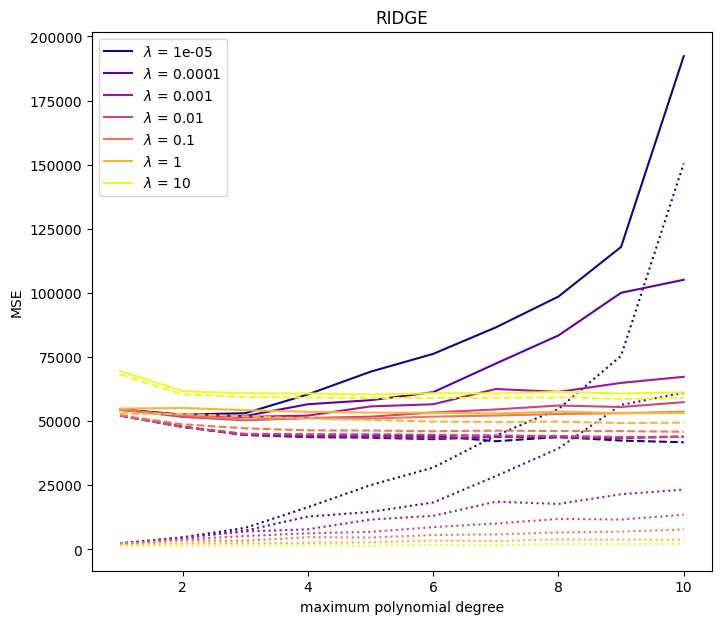

In [38]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,errors[it], linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs.plot(degrees,biases[it], linestyle='--', c = colors[it])
    axs.plot(degrees,variances[it],linestyle=':', c = colors[it])
    it += 1

axs.legend()
axs.set(title='RIDGE')

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE')

In [41]:
def LASSO_analysis_bootstrap(maxdegree, lambd,x1m,x2m,y):
    degrees = np.arange(1,maxdegree + 1)

    n_boostraps = 100

    ERROR  = np.zeros(maxdegree)
    VAR  = np.zeros(maxdegree)
    BIAS = np.zeros(maxdegree)
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    betas = np.zeros((maxdegree, num_monoms)) # for maxdegree = 5: 7 choose 5 is the number of possible monoms up to degree 5 for 2 variables (not -1 because the intercept will be added)
    MSE = np.zeros((maxdegree,2)) # 0.column for train, 1. for test
    R2 = np.zeros((maxdegree,2))
    for degree in degrees:
        #print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1
        X = design_no_in(x1m.flatten(), x2m.flatten(), degreeplus1)

        X_train, X_test, y_train, y_test = train_test_split(X, y.flatten(), test_size=0.2,random_state=20)

        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for i in range(n_boostraps):
            X_t, y_t = resample(X_train, y_train)
            ''' from Hishem → this makes it work !!!!''' 
            batch_size = 70
            #batch_size = len(X_train)
            indices = np.random.choice(len(X_train), size=batch_size, replace=True)
            X_t = X_train[indices]
            y_t = y_train[indices]
            ''' '''

            lasso = Lasso(lambd)
            lasso.fit(X_t,y_t)
            y_pred[:,i] = lasso.predict(X_test)
            
            #print('beta = {}'.format(betas[degree-1]))
        y_test_reshaped = y_test.reshape(y_test.shape[0],1)

        error = np.mean( np.mean((y_test_reshaped - y_pred)**2, axis=1, keepdims=True) )
        ERROR[degree -1] = error
        bias = np.mean( (y_test_reshaped - np.mean(y_pred, axis=1, keepdims=True))**2 )
        BIAS[degree -1] = bias
        variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
        #variance = np.mean( np.var(y_test_reshaped, axis=1, keepdims=True) )
        VAR[degree -1] = variance
        #print('Error:', error)
        #print('Bias^2:', bias)
        #print('Var:', variance)
        #print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

    return ERROR, BIAS, VAR, degrees

In [42]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

maxdegree = 10

errors = np.zeros((num_lambdas, maxdegree))
biases = np.zeros((num_lambdas, maxdegree))
variances = np.zeros((num_lambdas, maxdegree))

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors[it], biases[it], variances[it], degrees = LASSO_analysis_bootstrap(maxdegree,lambd,x1m,x2m,terrain1)

    it += 1

lambda = 1e-05


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.138e+06, tolerance: 5.424e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.245e+06, tolerance: 5.324e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.0001


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+06, tolerance: 7.911e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.335e+06, tolerance: 6.576e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.001


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.430e+06, tolerance: 7.112e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.311e+06, tolerance: 7.604e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.01


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.061e+06, tolerance: 6.920e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.456e+05, tolerance: 6.181e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.1


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.289e+04, tolerance: 6.526e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.209e+04, tolerance: 4.386e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 1


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.850e+02, tolerance: 6.819e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.683e+02, tolerance: 6.791e+02
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 10


In [43]:
np.save('biases_Lasso_bootstrap_terrain1.npy', biases)
np.save('MSE_Lasso_bootstrap_terrain1.npy', errors)
np.save('var_Lasso_bootstrap_terrain1.npy', variances)
np.save('lambdas_Lasso_bootstrap_terrain1.npy', lambdas)

[Text(0.5, 0, 'maximum polynomial degree'),
 Text(0, 0.5, 'MSE'),
 Text(0.5, 1.0, 'Lasso')]

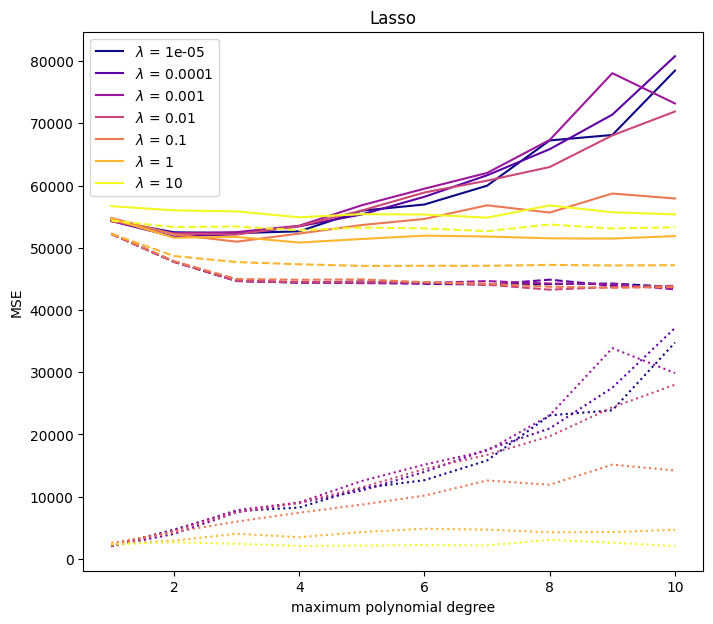

In [44]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,errors[it,:], linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    axs.plot(degrees,biases[it], linestyle='--', c = colors[it])
    axs.plot(degrees,variances[it],linestyle=':', c = colors[it])
    it += 1

axs.legend()

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE', title='Lasso')

In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def OLS_analysis_kfoldcv(maxdegree, k,x1m,x2m,y):
    degrees = np.arange(1,maxdegree + 1)
    kfold = KFold(n_splits = k)


    ERROR  = np.zeros((maxdegree, k))
    #VAR  = np.zeros(maxdegree)
    #BIAS = np.zeros(maxdegree)
        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    x = np.array([x1m.flatten(), x2m.flatten()]).T

    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1

        j = 0
        #y_pred = np.empty((int(np.ceil(y.flatten().size/k)), k))
        #y_pred = []
        for train_inds, test_inds in kfold.split(x):
            #print('train_inds: {}, test_inds: {}'.format(train_inds,test_inds))
            x_train = x[train_inds]
            y_train = y.flatten()[train_inds]
    
            x_test = x[test_inds]
            y_test = y.flatten()[test_inds]
    
            x1f = x_train[:,0]
            x2f = x_train[:,1]
            X_train = design_with_in(x1f, x2f, degreeplus1)
    
            x1f = x_test[:,0]
            x2f = x_test[:,1]
            X_test = design_with_in(x1f, x2f, degreeplus1)

            beta_lin = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ y_train # without intercept
            y_pre= X_test @ beta_lin 

            ERROR[degree -1,j] = np.mean((y_pre[:, np.newaxis] - y_test[:, np.newaxis])**2)   
            j += 1

        #biass = np.mean( (y_test[:, np.newaxis] - np.mean(y_pred, axis=1, keepdims=True))**2 )
        #BIAS[degree -1] = biass
        #variance = np.mean( np.var(y_pred, axis=1, keepdims=True) )
        #VAR[degree -1] = variance
            
    estimated_error = np.mean(ERROR, axis = 1)
    
    return estimated_error, degrees

In [33]:
estimated_error_OLS_CV_10, degrees = OLS_analysis_kfoldcv(10,10,x1m,x2m,terrain1)

DEGREE = 1


ValueError: could not broadcast input array from shape (648540,) into shape (648541,)

In [ ]:
#np.save('biases_OLS_CV-10_terrain1.npy', BIAS_OLS_CV_10)
np.save('MSE_OLS_CV-10_terrain1.npy', estimated_error_OLS_CV_10)
#np.save('var_OLS_CV-10_terrain1.npy', VAR_OLS_CV_10)


In [ ]:
plt.plot(degrees, estimated_error_OLS_CV_10, label='Error')
#plt.plot(degrees, BIAS_OLS_CV_10[:], label='bias^2')
#plt.plot(degrees, VAR_OLS_CV_10[:], label='Variance')
plt.xlabel('maximum polynomial degree')
plt.title('10-fold CV for OLS')
plt.legend()
plt.show()

In [18]:
estimated_error_OLS_CV_5, BIAS_OLS_CV_5, VAR_OLS_CV_5, degrees = OLS_analysis_kfoldcv(10,5,x1m,x2m,terrain1)

DEGREE = 1


ValueError: could not broadcast input array from shape (1297081,) into shape (1297080,)

In [19]:
estimated_error_OLS_CV_10, BIAS_OLS_CV_10, VAR_OLS_CV_10, degrees = OLS_analysis_kfoldcv(10,10,x1m,x2m,terrain1)

DEGREE = 1


ValueError: could not broadcast input array from shape (648541,) into shape (648540,)

In [ ]:
np.save('biases_OLS_CV-5_terrain1.npy', BIAS_OLS_CV_5)
np.save('MSE_OLS_CV-5_terrain1.npy', estimated_error_OLS_CV_5)
np.save('var_OLS_CV-5_terrain1.npy', VAR_OLS_CV_5)


In [ ]:
plt.plot(degrees, estimated_error_OLS_CV_5, label='Error')
plt.plot(degrees, BIAS_OLS_CV_5[:], label='bias^2')
plt.plot(degrees, VAR_OLS_CV_5[:], label='Variance')
plt.xlabel('maximum polynomial degree')
plt.title('5-fold CV for OLS')
plt.legend()
plt.show()

In [37]:
def RIDGE_analysis_kfoldcv(maxdegree, lambd, k,x1m,x2m,y):
    degrees = np.arange(1,maxdegree + 1)

    kfold = KFold(n_splits = k)


    ERROR  = np.zeros((maxdegree, k))

        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    x = np.array([x1m.flatten(), x2m.flatten()]).T

    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1

        j = 0
        for train_inds, test_inds in kfold.split(x):
            #print('train_inds: {}, test_inds: {}'.format(train_inds,test_inds))
            x_train = x[train_inds]
            y_train = y.flatten()[train_inds]
    
            x_test = x[test_inds]
            y_test = y.flatten()[test_inds]
    
            x1f = x_train[:,0]
            x2f = x_train[:,1]
            X_train = design_no_in(x1f, x2f, degreeplus1)
    
            x1f = x_test[:,0]
            x2f = x_test[:,1]
            X_test = design_no_in(x1f, x2f, degreeplus1)

            X_train_mean = np.mean(X_train, axis=0)
            X_train_scaled = X_train  - X_train_mean
        
            y_train_mean = np.mean(y_train)
            y_train_scaled = y_train - y_train_mean
        
            # in order to use beta for test → test has to be scaled by training means
            X_test_scaled = X_test - X_train_mean

            beta_rr = np.linalg.inv(X_train_scaled.T @ X_train_scaled + lambd*np.identity(X_train_scaled.shape[1])) @ X_train_scaled.T @ y_train_scaled #without intercept

            #print('beta = {}'.format(beta_rr))
            
            y_pred = X_test_scaled @ beta_rr + y_train_mean

            ERROR[degree -1,j] = np.mean((y_pred[:, np.newaxis] - y_test[:, np.newaxis])**2)            
            j += 1
            
    estimated_error = np.mean(ERROR, axis = 1)
    
    return estimated_error, degrees

In [38]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

maxdegree = 10

errors_CV5_Ridge = np.zeros((num_lambdas, maxdegree))

k = 5

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors_CV5_Ridge[it,:], degrees= RIDGE_analysis_kfoldcv(maxdegree, lambd, k,x1m,x2m,terrain1)
    it += 1

lambda = 1e-05
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
lambda = 0.0001
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
lambda = 0.001
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
lambda = 0.01
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
lambda = 0.1
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
lambda = 1
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10
lambda = 10
DEGREE = 1
DEGREE = 2
DEGREE = 3
DEGREE = 4
DEGREE = 5
DEGREE = 6
DEGREE = 7
DEGREE = 8
DEGREE = 9
DEGREE = 10


In [39]:

np.save('MSE_RIDGE_CV-5_terrain1.npy', errors_CV5_Ridge)


[Text(0.5, 0, 'maximum polynomial degree'),
 Text(0, 0.5, 'MSE'),
 Text(0.5, 1.0, 'MSE by 5-fold CV with Ridge')]

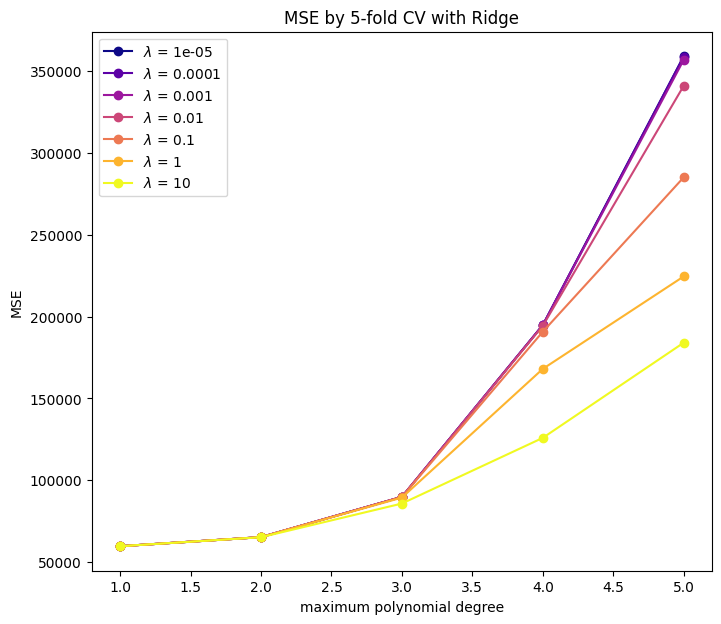

In [42]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees[:5],errors_CV5_Ridge[it,:5], marker='o', linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs.legend()

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE', title='MSE by 5-fold CV with Ridge')

In [ ]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

maxdegree = 10

errors_CV10_Ridge = np.zeros((num_lambdas, maxdegree))

k = 10

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors_CV10_Ridge[it,:], degrees= RIDGE_analysis_kfoldcv(maxdegree, lambd, k,x1m,x2m,terrain1)
    it += 1


np.save('MSE_RIDGE_CV-10_terrain1.npy', errors_CV10_Ridge)

DEGREE = 3
DEGREE = 4


In [ ]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,errors_CV10_Ridge[it,:], marker='o', linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs.legend()

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE', title='MSE by 10-fold CV with Ridge')

In [ ]:
# TODO NOW LASSOOOO

In [9]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


def LASSO_analysis_kfoldcv(maxdegree, lambd, k,x1m,x2m,y):
    degrees = np.arange(1,maxdegree + 1)

    kfold = KFold(n_splits = k)


    ERROR  = np.zeros((maxdegree, k))

        
    num_monoms = int(scipy.special.binom(maxdegree + 2, maxdegree))

    x = np.array([x1m.flatten(), x2m.flatten()]).T

    for degree in degrees:
        print('DEGREE = ' + str(degree))
        degreeplus1 = degree + 1

        j = 0
        for train_inds, test_inds in kfold.split(x):
            #print('train_inds: {}, test_inds: {}'.format(train_inds,test_inds))
            x_train = x[train_inds]
            y_train = y.flatten()[train_inds]
    
            x_test = x[test_inds]
            y_test = y.flatten()[test_inds]
    
            x1f = x_train[:,0]
            x2f = x_train[:,1]
            X_train = design_no_in(x1f, x2f, degreeplus1)
    
            x1f = x_test[:,0]
            x2f = x_test[:,1]
            X_test = design_no_in(x1f, x2f, degreeplus1)

            # LASSO REGRESSION: (without intercept, = 0 thus)
            lasso = Lasso(lambd)
            lasso.fit(X_train,y_train)
            y_pred = lasso.predict(X_test)

            ERROR[degree -1,j] = np.mean((y_pred[:, np.newaxis] - y_test[:, np.newaxis])**2)            
            j += 1
            
    estimated_error = np.mean(ERROR, axis = 1)
    
    return estimated_error, degrees
    

In [ ]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

maxdegree = 10

k = 5
errors_CV5_Lasso = np.zeros((num_lambdas, maxdegree))

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors_CV5_Lasso[it,:], degrees= LASSO_analysis_kfoldcv(maxdegree, lambd,k, x1m,x2m,terrain1)
    it += 1

lambda = 1e-05
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.120e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.266e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.112e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.239e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.103e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.095e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.089e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.195e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.085e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.183e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.170e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.159e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.0001
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.111e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.260e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.106e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.100e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.093e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.087e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.191e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.178e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.079e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.166e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.076e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.155e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.001
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.021e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.194e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.050e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.071e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.188e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.072e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.177e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.065e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.053e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.135e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.124e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.042e+11, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+11, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

lambda = 0.01
DEGREE = 1
DEGREE = 2
DEGREE = 3


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.216e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.069e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 4


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.167e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.324e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 5


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.543e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.187e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 6


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.484e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.904e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 7


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.479e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.466e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 8


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.891e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.826e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 9


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.086e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.185e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

DEGREE = 10


/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.770e+10, tolerance: 3.688e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.502e+10, tolerance: 5.010e+07
  model = cd_fast.enet_coordinate_descent(
/home/gd/Dokumente/UIOSLO/SE01/FYS_STK4155/jupyternotebooks/sklearn-env/lib64/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Obje

In [ ]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,errors_CV5_Lasso[it,:], marker='o', linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs.legend()

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE', title='5-fold CV for Lasso')

In [ ]:
np.save('MSE_LASSO_CV-5_terrain1.npy', errors_CV5_Lasso)

In [22]:
lambdas = [0.00001, 0.0001, 0.001, 0.01, 0.1,1,10]
num_lambdas = len(lambdas)

maxdegree = 10

k = 10
errors_CV10_Lasso = np.zeros((num_lambdas, maxdegree))

it = 0
for lambd in lambdas:
    print('lambda = {}'.format(lambd))
    errors_CV10_Lasso[it,:], degrees= LASSO_analysis_kfoldcv(maxdegree, lambd, k,x1m,x2m,terrain1)
    it += 1

lambda = 1e-05
DEGREE = 1


ValueError: could not broadcast input array from shape (5836860,) into shape (6485401,)

In [ ]:

np.save('MSE_LASSO_CV-10_terrain1.npy', errors_CV10_Lasso)

In [ ]:
import matplotlib as mpl
# colours for lambdas
cmap = mpl.colormaps['plasma']
# Take colors at regular intervals spanning the colormap.
colors = cmap(np.linspace(0, 1, num_lambdas))

fig = plt.figure(figsize=(8, 7))
axs = plt.gca()
# TODO → get a list that has a colour for each lambda
it = 0
for lambd in lambdas:
    axs.plot(degrees,errors_CV10_Lasso[it,:], marker='o', linestyle='-', c = colors[it], label=r'$\lambda$ = {}'.format(lambd))
    it += 1

axs.legend()

axs.set(xlabel =r'maximum polynomial degree', ylabel= r'MSE', title='10-fold CV for Lasso')